4. Now modify the code such that you sample the position of two particles
in 3D connected by a spring of equilibrium length L=4

U (q1, q2) = 1/2 (|q1 −q2|−L)^2

Notice that q1 and q2 are now vectors with three components each. (Hint:
at every iteration, choose randomly one of the two particles and one of the
three possible components and displace it by a random displacement uni-
formly distributed in [−∆, +∆]). Compute the average distance |q1 −q2|
between the two particles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rm

In [6]:
# uniform distribution [-delta,+delta]
def trial(q1,q2,delta):
    if (rm.randrange(0,2))==0:
        q1[rm.randrange(0,3)]=(rm.random()*2-1)*delta
    else:
        q2[rm.randrange(0,3)]=(rm.random()*2-1)*delta
    return q1,q2

In [3]:
# potential energy
def u(q1,q2,L=4):
    return 0.5*(np.sqrt(np.sum((q1-q2)**2))-L)**2  #(np.linalg.norm(q1-q2)-L)**2
#def udist(distance,L=4):
#    return 1/2*(distance-L)**2

In [4]:
def run(*,kT=1,delta=1.0,nsteps=100,q1=None,q2=None):#np.array([0.0,0.0,0.0]),q2=np.array([0.0,0.0,0.0])):
    if q1 is None:
        q1=np.zeros(1,3)
    if q2 is None:
        q2=np.zeros(1,3)
    
    #traj1=[]
    time=[]
    distance=[]
    avalpha=0
    #norm=0


    #traj1.append(q1)#,q2)
    time.append(0)
    #norm=np.linalg.norm(q1-q2)
    #print(norm)
    #distance.append(norm)
    distance.append(np.linalg.norm(q1-q2))
    #u0=u(q1,q2)
    u0=u(q1,q2)
    print(u0)

    for istep in range(nsteps):
        q1try,q2try=trial(q1,q2,delta)
        utry=u(q1,q2)
        alpha=np.exp(-(utry-u0)/kT)
        #  if alpha>1: alpha=1
        if alpha>rm.random():
        #if utry<u0: # limit of zero temperature
            avalpha+=1
            q1=+q1try
            q2=+q2try
            u0=utry
        
        distance.append(np.linalg.norm(q1-q2))
        #traj1.append(q1)
        time.append(istep)

    avalpha=avalpha/nsteps    

    return np.array(time),distance,avalpha #np.array(traj),avalpha,q2mean

2.5717967697244912
average acceptance:  0.7258
mean distance:  0.6562132231781063
<BarContainer object of 100 artists>


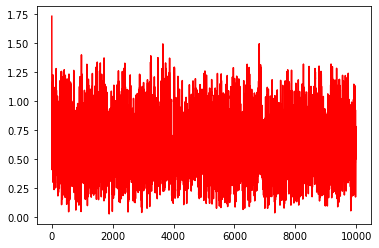

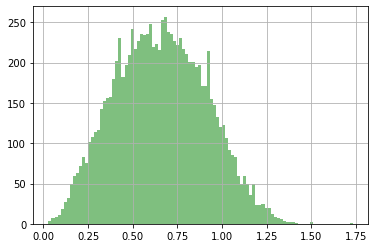

In [8]:
nsteps=10000
kT=1
delta=0.5
q1=np.array([0.0,0.0,0.0])
q2=np.array([1.0,1.0,1.0])

time,distance,avalpha=run(kT=kT,delta=delta,nsteps=nsteps,q1=q1,q2=q2)
print('average acceptance: ',avalpha)
#print('distance:',distance)
print('mean distance: ',np.mean(distance))
#print('std distance: ',np.std(distance)/np.sqrt(nsteps))
#print(distance)
plt.figure(1)
plt.plot(time,distance,'-r',label='distance(time)')

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(distance, nbins,facecolor='green', alpha=0.5)
print(patches)
plt.grid(axis='both')
plt.show()

4.946237765387346
0.2193151826099383


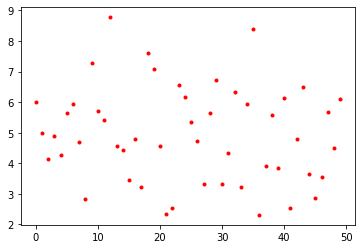

In [144]:
nsteps=10000
kT=0.5
delta=0.1

niter=50
meandistances=[]
iiter=[]

for i in range(niter):
    time,distance,alpha=run(kT=kT,delta=delta,nsteps=nsteps,q1=np.array([0.0,0.0,0.0]),q2=np.array([1.0,1.0,3.5]))
    meandistances.append(np.mean(distance))
    iiter.append(i)

#print(meandistances)
plt.plot(iiter,meandistances,'.r')
meandistance=np.mean(meandistances)
stdmeandistance=np.std(meandistances)/np.sqrt(niter)
print(meandistance)
print(stdmeandistance)

## Bussi's code: why mine doesn't work? 

In [155]:
def ener(q,L=4):
    return 0.5*(np.sqrt(np.sum((q[1]-q[0])**2))-L)**2

In [156]:
def MC(nsteps=10000,delta=1.0,q0=None,L=4,kT=1):
    if q0 is None:
        q0=np.zeros((2,3))
    
    q=+q0
    #energy=ener(q)
    energy=0.5*(np.sqrt(np.sum((q[1]-q[0])**2))-L)**2
    traj=[]
    for istep in range(nsteps):
        i=np.random.randint(6)
        qtry=+q
        inc=(2*np.random.rand()-1)*delta
        if(i<3):
            qtry[0,i]+=inc
        else:
            qtry[1,i-3]+=inc
            
        ##enetry=ener(qtry)##0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        enetry=0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        acc=np.exp(-(enetry-energy)/kT)
        if acc>1.0:
            acc=1.0
        if acc>np.random.rand():
            q=+qtry
            energy=enetry
        traj.append(q)
    return np.array(traj)

<BarContainer object of 100 artists>


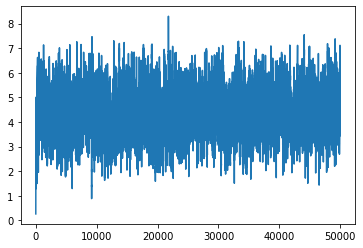

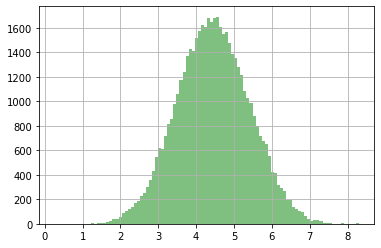

In [157]:
traj=MC(nsteps=50000)
distances=np.sqrt((traj[:,0,0]-traj[:,1,0])**2+(traj[:,0,1]-traj[:,1,1])**2+(traj[:,0,2]-traj[:,1,2])**2)
plt.plot(distances)

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(distances, nbins,facecolor='green', alpha=0.5)
print(patches)
plt.grid(axis='both')
plt.show()

In [52]:
print(traj[:,0,0]-traj[:,1,0])
print(traj[1,:])
print(traj[:,1,:])
#print(traj[0,1,0])
#plt.plot()

[[0.        0.        0.       ]
 [0.0296359 0.        0.       ]]
[[0.         0.         0.        ]
 [0.06755276 0.         0.        ]]
[[ 0.0296359   0.          0.        ]
 [ 0.06755276  0.          0.        ]
 [ 0.06755276  0.          0.        ]
 ...
 [-2.45048335 -1.86393715 -0.40367554]
 [-2.45048335 -1.86393715 -0.40367554]
 [-2.45048335 -1.86393715 -0.40367554]]


In [144]:
def MCbussi(nsteps=10000,delta=1.0,q0=None,L=4,kT=1):
    if q0 is None:
        q0=np.zeros((2,3))
    
    q=+q0
    #energy=ener(q)
    energy=0.5*(np.sqrt(np.sum((q[1]-q[0])**2))-L)**2
    traj=[]
    for istep in range(nsteps):
        i=np.random.randint(6)
        qtry=+q
        inc=(2*np.random.rand()-1)*delta
        if(i<3):
            qtry[0,i]+=inc
        else:
            qtry[1,i-3]+=inc
            
        ##enetry=ener(qtry)##0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        enetry=0.5*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        acc=np.exp(-(enetry-energy)/kT)
        if acc>1.0:
            acc=1.0
        if acc>np.random.rand():
            q=+qtry
            energy=enetry
        traj.append(q)
    return np.array(traj)

<BarContainer object of 100 artists>


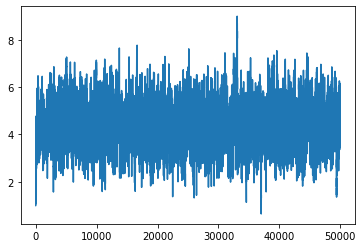

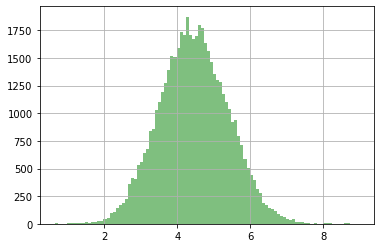

In [145]:
traj=MCbussi(nsteps=50000)
#distances=np.sqrt((traj[:,0,0]-traj[:,1,0])**2+(traj[:,0,1]-traj[:,1,1])**2+(traj[:,0,2]-traj[:,1,2])**2)
distances=np.sqrt(np.sum((traj[:,1]-traj[:,0])**2,axis=1))
plt.plot(distances)

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(distances, nbins,facecolor='green', alpha=0.5)
print(patches)
plt.grid(axis='both')
plt.show()